In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv("vehicle_data.csv")

# Data Cleaning and Preprocessing
data.drop(columns=['Device ID', '__index_level_0__'], inplace=True)  # Remove irrelevant columns
data['UTC'] = pd.to_datetime(data['UTC'])  # Convert UTC to datetime
data.dropna(inplace=True)  # Drop rows with missing values

# Feature Engineering
data['Speed_difference'] = data['VehicleSpeed'].diff().fillna(0)  # Calculate speed difference
data['Distance_difference'] = data['TotalDistance'].diff().fillna(0)  # Calculate distance difference

# Exploratory Data Analysis (EDA)
sns.pairplot(data[['TotalDistance', 'EngineSpeed', 'VehicleSpeed', 'FuelLevel', 'AccPedalPosition', 'HRLFC']])
plt.show()

# Safety Analysis
# Add your safety analysis here based on thresholds and anomalies detected

# Hotspot Zone Identification
X = data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=3)  # Assuming 3 hotspot zones, adjust as needed
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Plot Hotspot Zones
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis')
plt.title('Hotspot Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 326.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 321.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.4 MB/s eta 0:00:04
    --------------------------------------- 0.2/10.6 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.6 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.6 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.6 MB 2.0 MB/s eta 0:00:06
   -- ---------

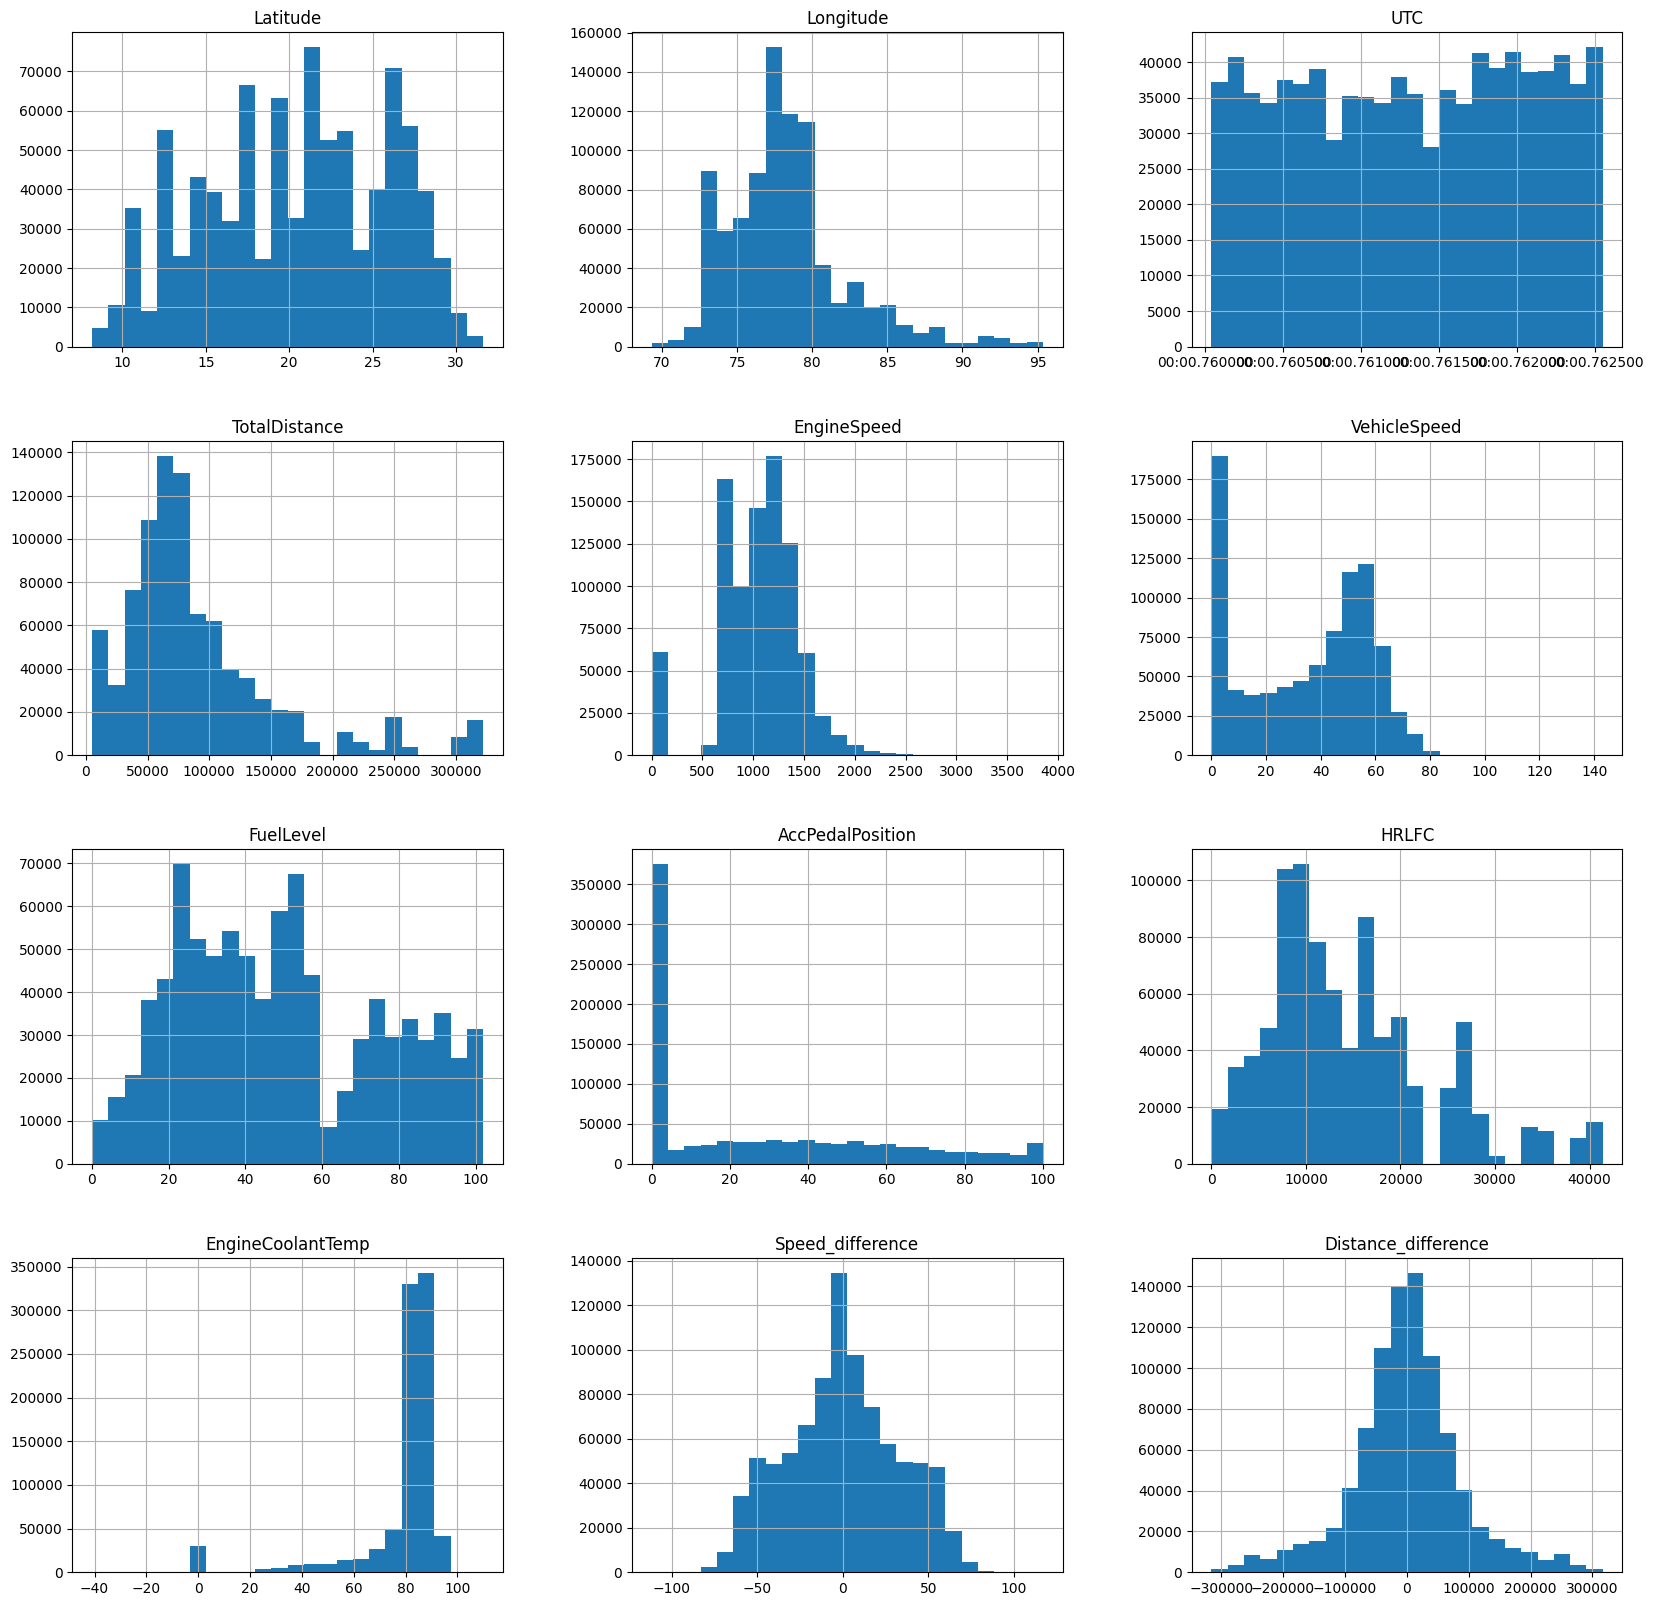

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv("converted.csv")

# Data Cleaning and Preprocessing
data.drop(columns=['Device ID', '__index_level_0__'], inplace=True)  # Remove irrelevant columns
data['UTC'] = pd.to_datetime(data['UTC'])  # Convert UTC to datetime
data.dropna(inplace=True)  # Drop rows with missing values

# Feature Engineering
data['Speed_difference'] = data['VehicleSpeed'].diff().fillna(0)  # Calculate speed difference
data['Distance_difference'] = data['TotalDistance'].diff().fillna(0)  # Calculate distance difference

hist = data.hist(bins=24, figsize=(20,20) )

# Exploratory Data Analysis (EDA)
#sns.pairplot(data[['TotalDistance', 'EngineSpeed', 'VehicleSpeed', 'FuelLevel', 'AccPedalPosition', 'HRLFC']])
plt.show()

#Anomaly Detection
anomaly_threshold = 3  # Set anomaly threshold (adjust as needed)
anomalies = data[(np.abs(data['Speed_difference']) > anomaly_threshold) |
                (np.abs(data['Distance_difference']) > anomaly_threshold)]



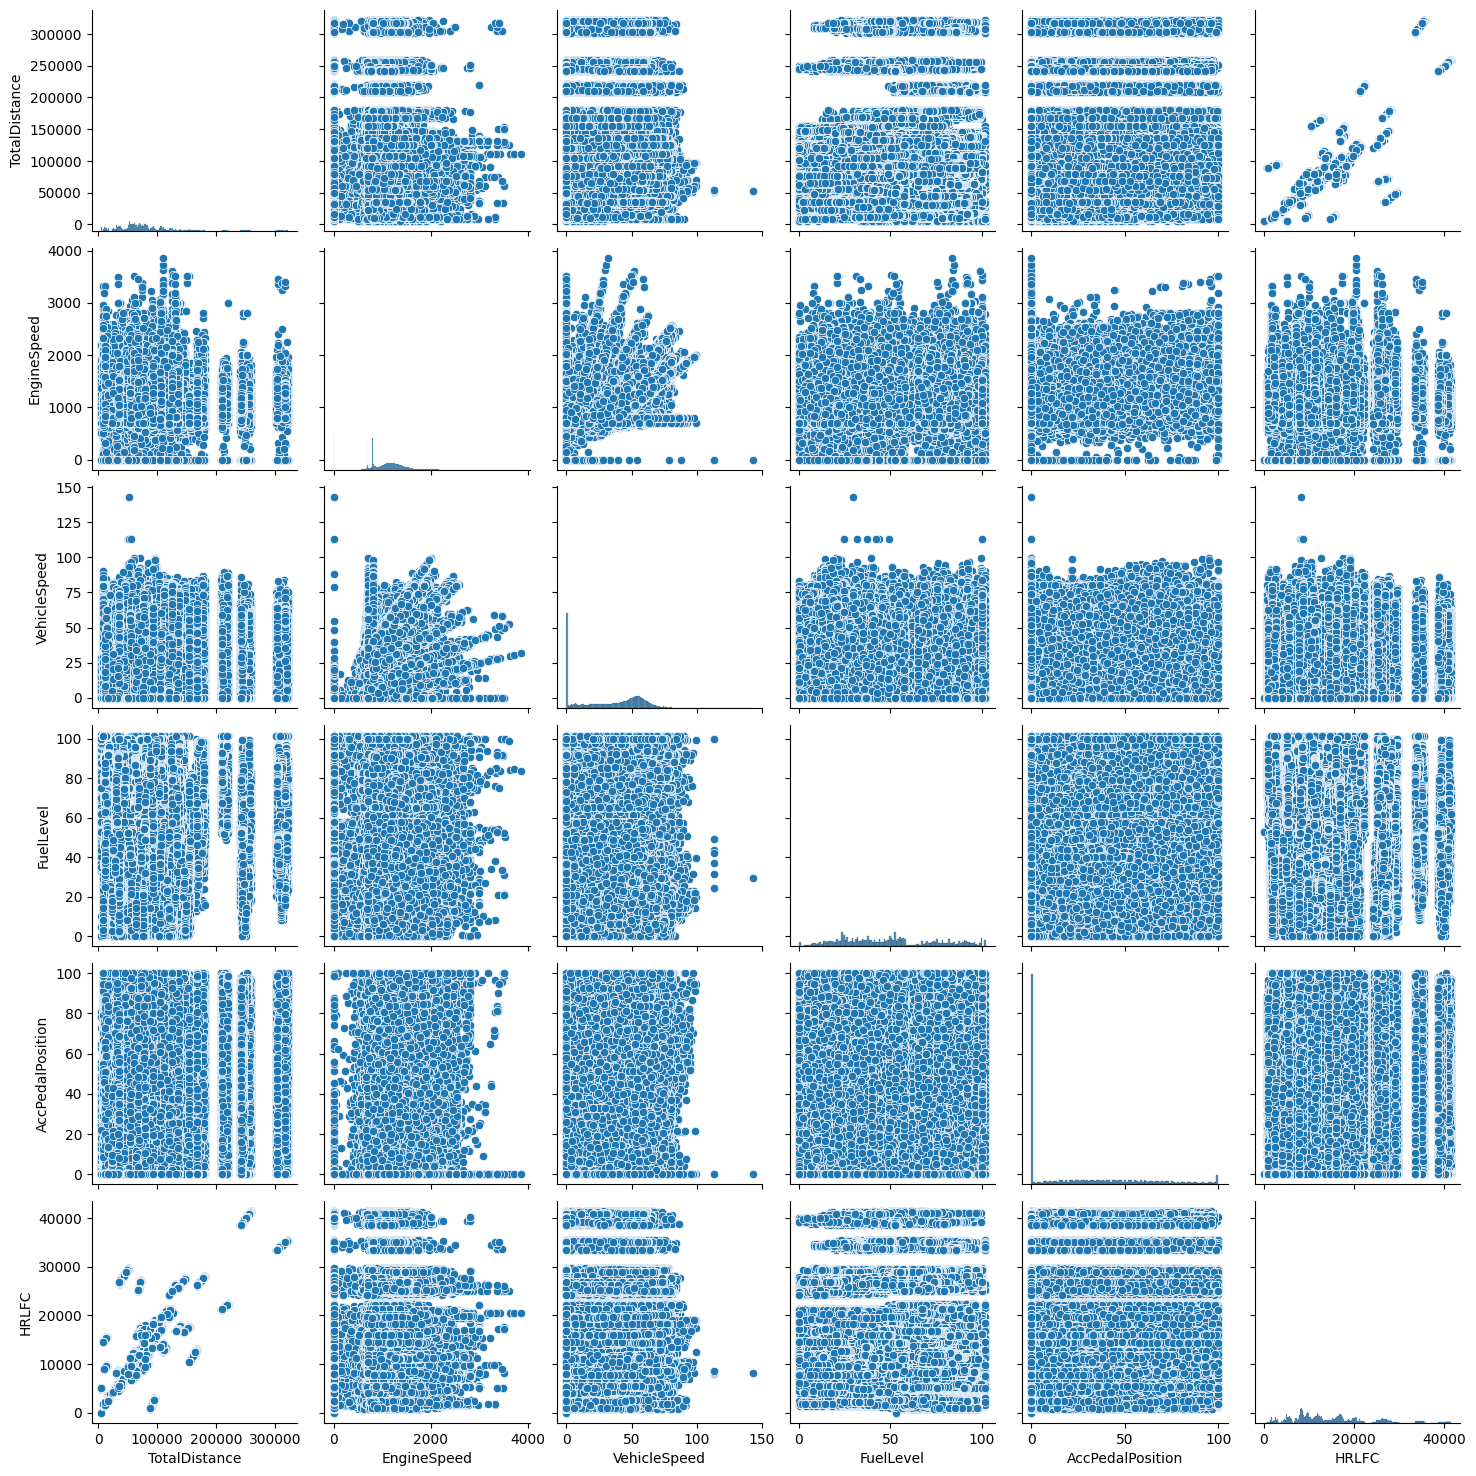

In [47]:
sns.pairplot(data[['TotalDistance', 'EngineSpeed', 'VehicleSpeed', 'FuelLevel', 'AccPedalPosition', 'HRLFC']])
plt.show()

<Axes: >

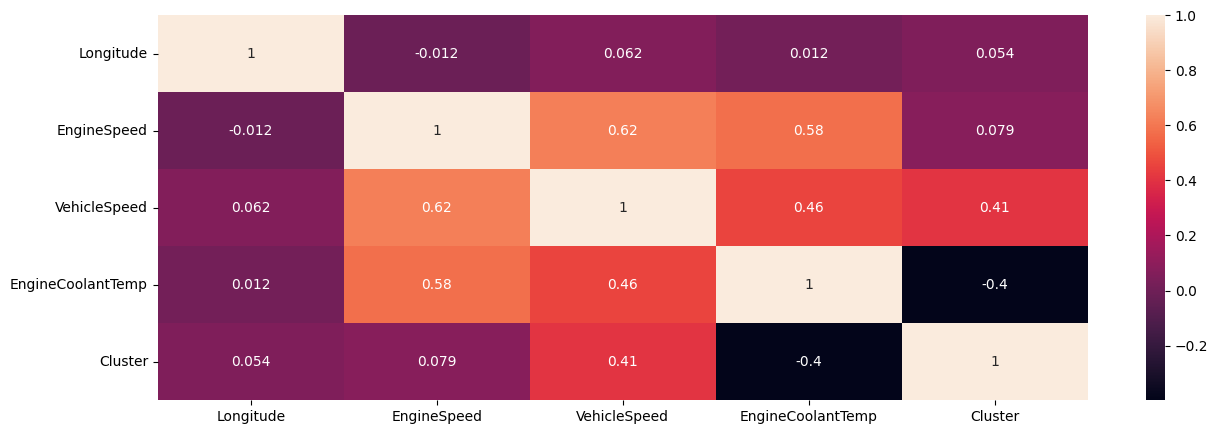

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
sns.heatmap(data.iloc[:,1:].corr(),annot=True)

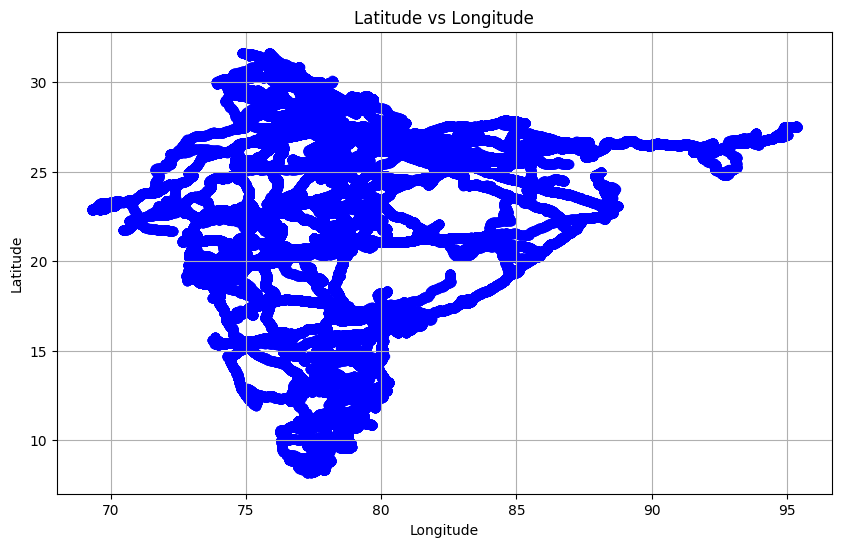

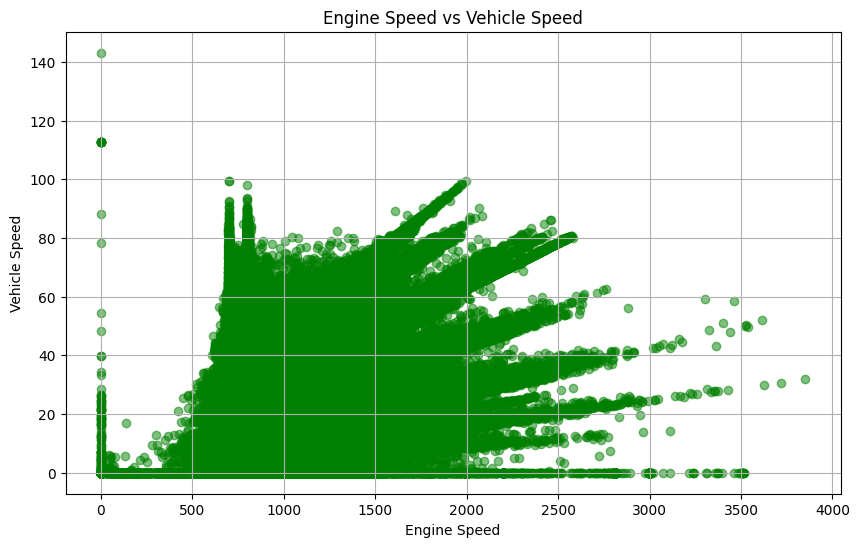

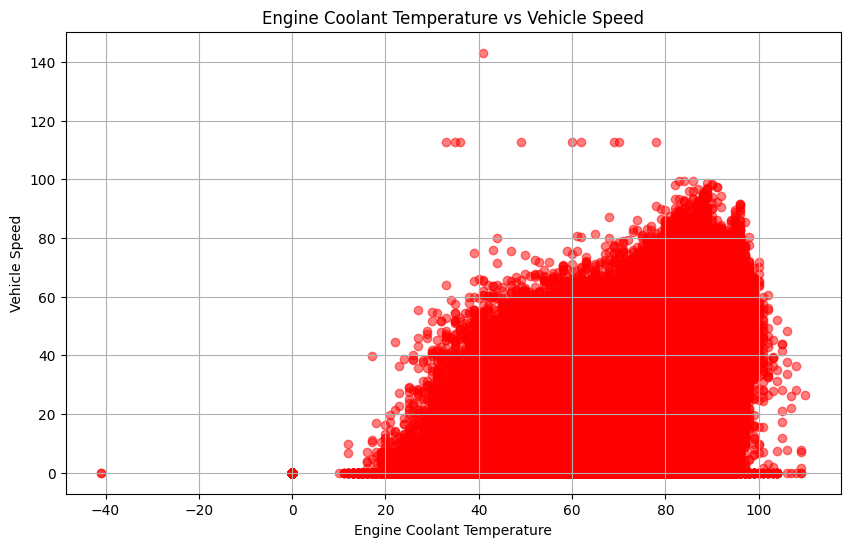

In [42]:
# Plot Latitude vs Longitude
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c='blue', alpha=0.5)
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Plot Engine Speed vs Vehicle Speed
plt.figure(figsize=(10, 6))
plt.scatter(data['EngineSpeed'], data['VehicleSpeed'], c='green', alpha=0.5)
plt.title('Engine Speed vs Vehicle Speed')
plt.xlabel('Engine Speed')
plt.ylabel('Vehicle Speed')
plt.grid(True)
plt.show()

# Plot Engine Coolant Temperature vs Vehicle Speed
plt.figure(figsize=(10, 6))
plt.scatter(data['EngineCoolantTemp'], data['VehicleSpeed'], c='red', alpha=0.5)
plt.title('Engine Coolant Temperature vs Vehicle Speed')
plt.xlabel('Engine Coolant Temperature')
plt.ylabel('Vehicle Speed')
plt.grid(True)
plt.show()

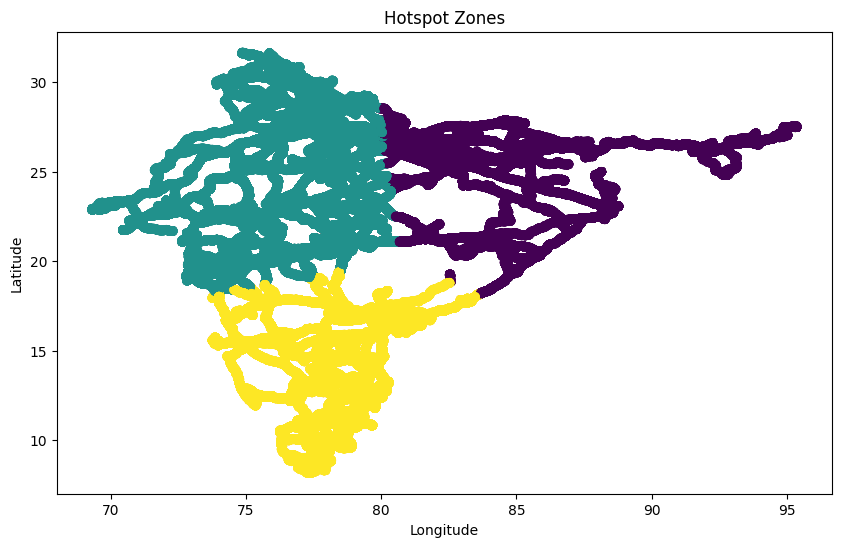

In [15]:
# Safety Analysis
# Add your safety analysis here based on thresholds and anomalies detected

# Hotspot Zone Identification
X = data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=3)  # Assuming 3 hotspot zones, adjust as needed
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Plot Hotspot Zones
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis')
plt.title('Hotspot Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


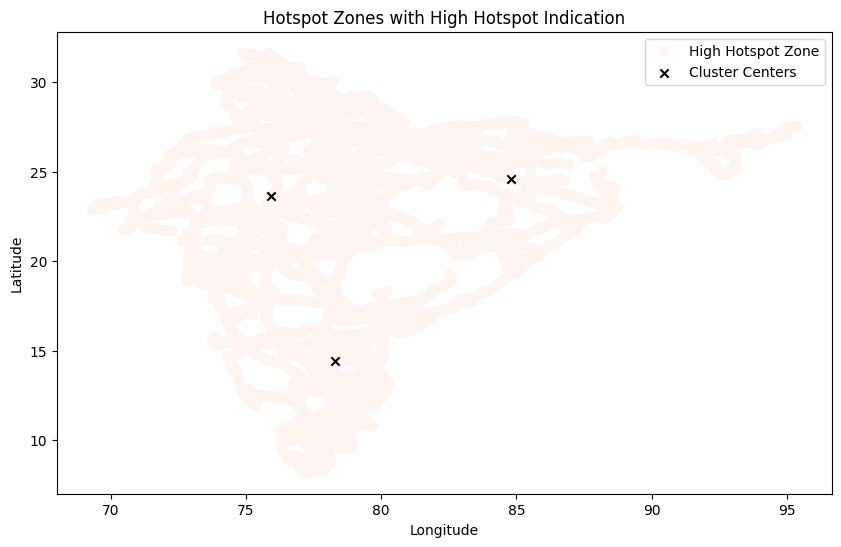

In [16]:
# Hotspot Zone Identification
X = data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=3)  # Assuming 3 hotspot zones, adjust as needed
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Calculate cluster densities
cluster_centers = kmeans.cluster_centers_
data['Distance_to_center'] = np.linalg.norm(X - cluster_centers[data['Cluster']], axis=1)
cluster_sizes = data.groupby('Cluster').size()
data['Cluster_density'] = data['Distance_to_center'].apply(lambda x: cluster_sizes.min() / (x + 1e-6))  # Avoid division by zero

# Define threshold for high hotspot zone
high_hotspot_threshold = 0.5  # Adjust as needed

# Add column indicating high hotspot zone
data['High_Hotspot_Zone'] = data['Cluster_density'] > high_hotspot_threshold

# Plot Hotspot Zones with indication of high hotspot zones
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['High_Hotspot_Zone'], cmap='Reds', label='High Hotspot Zone')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='x', color='black', label='Cluster Centers')
plt.title('Hotspot Zones with High Hotspot Indication')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [43]:
# Load the dataset
data = pd.read_csv('converted.csv')

# Analyze instances of aggressive driving or inefficient fuel usage
aggressive_driving_threshold = 70  # Adjust threshold as needed
inefficient_fuel_threshold = 80  # Adjust threshold as needed

# Identify instances of aggressive driving
aggressive_driving = data[data['AccPedalPosition'] > aggressive_driving_threshold]

#print(aggressive_driving.head())
print("Accelerator Pedal position for aggressive driving")
#df1 = pd.DataFrame(aggressive_driving['Latitude'],aggressive_driving['Longitude'])
#print(df1)
print(aggressive_driving['AccPedalPosition'])


# Identify instances of inefficient fuel usage
inefficient_fuel_usage = data[data['HRLFC'] > inefficient_fuel_threshold]
print("HRLFC on which inefficient fuel usage happens")
#print(inefficient_fuel_usage.head())
print(inefficient_fuel_usage['HRLFC'])

# Print summary statistics
print("Summary Statistics:")
print(f"Number of instances of aggressive driving: {len(aggressive_driving)}")
print(f"Number of instances of inefficient fuel usage: {len(inefficient_fuel_usage)}")

Accelerator Pedal position for aggressive driving
1          96.0
15         80.4
16        100.0
28         75.2
29         78.4
          ...  
885799     92.8
885812     78.8
885823     76.4
885828     72.0
885843     87.6
Name: AccPedalPosition, Length: 114902, dtype: float64
HRLFC on which inefficient fuel usage happens
0         12704.93
1         20240.82
2          6039.37
3          9002.99
4         16870.80
            ...   
885843    25222.00
885844     5548.20
885845    19765.07
885846    15971.25
885847    10517.78
Name: HRLFC, Length: 885846, dtype: float64
Summary Statistics:
Number of instances of aggressive driving: 114902
Number of instances of inefficient fuel usage: 885846


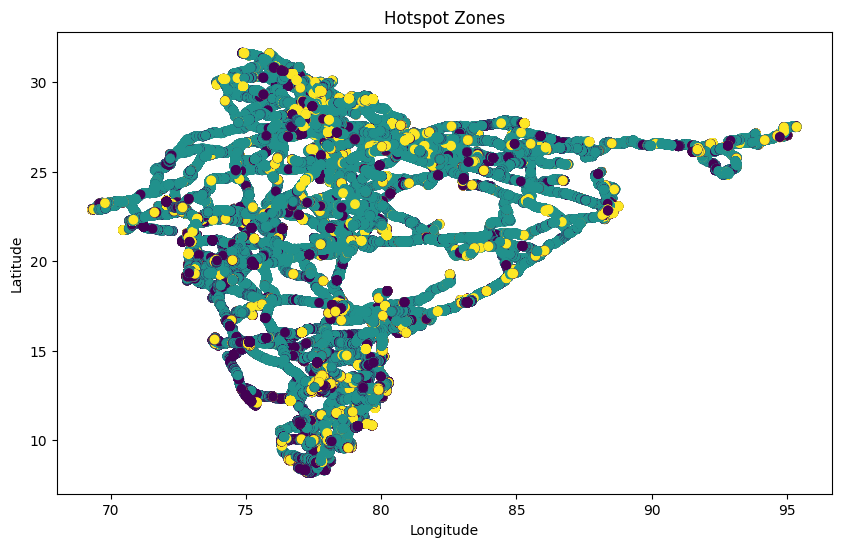

In [44]:
from sklearn.cluster import KMeans

# Load data containing required columns
data = pd.read_csv("converted.csv", usecols=['Latitude', 'Longitude', 'EngineSpeed', 'VehicleSpeed', 'EngineCoolantTemp'])

# Drop rows with missing values
data.dropna(inplace=True)

# Normalize the data
data_normalized = (data - data.mean()) / data.std()

# Combine Latitude, Longitude, EngineSpeed, VehicleSpeed, and EngineCoolantTemp into one DataFrame
X = data_normalized[['Latitude', 'Longitude', 'EngineSpeed', 'VehicleSpeed', 'EngineCoolantTemp']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X)
data['Cluster'] = kmeans.labels_
#print(data)

# Plot Hotspot Zones
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis')
plt.title('Hotspot Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [13]:
# Calculate z-scores for each column
z_scores = (data - data.mean()) / data.std()

# Define threshold for outlier detection
outlier_threshold = 3  # Adjust as needed

# Find outliers
outliers = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Count outliers in each column
outlier_counts = outliers.sum()

print("Outlier Counts:")
print(outlier_counts)

Outlier Counts:
Latitude                 0
Longitude            14978
EngineSpeed           2235
VehicleSpeed            10
EngineCoolantTemp    31488
Cluster                  0
dtype: int64
